In [40]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

In [41]:
path_file = 'C:/Users/JulesBoutibou/Documents/Perso/PIP/DATA/Data_G2/Donnees_v1.csv'
df = pd.read_csv(path_file)
df = df.drop(columns = ['Unnamed: 0'])

AttributeError: 'DataFrame' object has no attribute 'remove'

In [43]:
df['TAUX_LECTURE_MS_6M']=df['TAUX_LECTURE_MS_6M'].str.rstrip('%').astype('float') / 100.0
df['TAUX_LECTURE_PAP_6M']=df['TAUX_LECTURE_PAP_6M'].str.rstrip('%').astype('float') / 100.0
df['TAUX_LECTURE_EMAIL_6M']=df['TAUX_LECTURE_EMAIL_6M'].str.rstrip('%').astype('float') / 100.0

In [52]:
X = df.drop(columns = ['TOP_FRAUDE_VIREMENT','TOP_FRAUDE_CARTE','TOP_FRAUDE', 'ID'])
y = df.TOP_FRAUDE

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X) 
X = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)

In [ ]:
pca = PCA(200) # définition du modèle
pca.fit(X,y) # Ajuste le modèle
x_new = pca.transform(X) # Applique la réduction de dimension sur X

In [11]:
np.sum(pca.explained_variance_ratio_)

0.8692308033857606

## LDA

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt


In [73]:
clf = LinearDiscriminantAnalysis()
data = clf.fit(X , y).transform(X)

In [74]:
importances = clf.coef_
importances = importances.reshape(len(X.columns) , 1)

In [75]:
d = dict(zip(X.columns , importances))
d_tri = sorted(d.items(), key=lambda t: np.abs(t[1]))

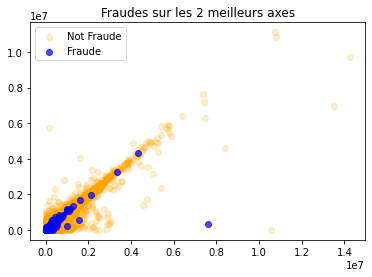

In [76]:
plt.scatter(df[df["TOP_FRAUDE"]==0][d_tri[-1][0]], df[df["TOP_FRAUDE"]==0][d_tri[-2][0]], alpha=0.2, c="orange", label="Not Fraude")
plt.scatter(df[df["TOP_FRAUDE"]==1][d_tri[-1][0]], df[df["TOP_FRAUDE"]==1][d_tri[-2][0]], alpha=0.7, c="blue", label="Fraude")
plt.legend()
plt.title('Fraudes sur les 2 meilleurs axes')
plt.show()

In [77]:
col = [d_tri[-50:][i][0] for i in range(len(d_tri[-50:]))]
col

['Tranche_age_1_76-85',
 'mt_ret_carte_Aut_bq_M6',
 'Tranche_age_1_18-25',
 'seg_nature_potentiel_GP ACTIF',
 'profil_actifs classiques',
 'Tranche_age_moyen_66-75',
 'Tranche_age_moyen_56-65',
 'Tranche_age_1_66-75',
 'profil_Très peu actifs',
 'Tranche_age_moyen_46-55',
 'Tranche_age_1_36-45',
 'profil_sans contact',
 'Tranche_age_1_56-65',
 'Tranche_age_1_26-35',
 'Tranche_age_moyen_36-45',
 'Tranche_age_moyen_18-25',
 'Tranche_age_moyen_26-35',
 'Tranche_age_1_46-55',
 'profil_Digital Ma Banque',
 'seg_nature_potentiel_INT DYNAMIQUE',
 "contrat_travail_1_NE S'APPLIQUE PAS",
 'situ_globale_Famille',
 'situ_globale_Couple',
 'situ_globale_M seul',
 'EPARGNE_LOGEMENT_ECART_M6',
 'situ_globale_F seule',
 'EMPRUNTS',
 'EMPRUNTS_M6',
 'mt_ret_carte_CRCA_M6',
 'contrat_travail_1_CONTRAT A DUREE INDETERMINEE',
 'contrat_travail_1_INCONNU',
 'mt_retrait_carte_M6',
 'seg_nature_potentiel_INTERM',
 'sexe_1_F',
 'sexe_1_M',
 'seg_nature_potentiel_GRAND PUBLIC',
 'MONETAIRE_BLOQUE_ECART_M6',
 '